In [1]:
import pandas 

In [2]:
feature_sets = [ 
    '/Users/alex/Documents/bagel-benchmark/rosetta_runs/benchmark/feature_set.csv',
    '/Users/alex/Documents/bagel-benchmark/foldx_runs/pssm/feature_set.csv', 
    '/Users/alex/Documents/bagel-benchmark/rosetta_runs/ddg_monomer/feature_set.csv', 
]

In [3]:
df = pandas.read_csv( '../data_sets/experimental_data/data_set.csv', index_col=0 ) 

In [4]:
# wt score in benchamrk feature set -692.04100

In [5]:
mutants_of_interest = [
    'E164A', 
    'N404C', 
    'E222H',
    
]

In [6]:
pandas.options.display.max_rows = 1000

In [7]:
for mutant_of_interest in mutants_of_interest: 
    print( mutant_of_interest ) 
    for feature_set in feature_sets:
        my_df = pandas.read_csv( feature_set, index_col=0 ) 
        J = df.join( my_df ) 
        my_feats = J.loc[ mutant_of_interest ] 
        some_bull_shit = [ i for i in my_feats.index if i in [ 'total_score', 'total', 'total energy' ] ]
        print( feature_set.split( '/' )[-2], J.loc[ mutant_of_interest ][ some_bull_shit ] ) 

E164A
benchmark total_score   -694.839
Name: E164A, dtype: object
pssm total energy    1.04205
Name: E164A, dtype: object
ddg_monomer total   -0.732
Name: E164A, dtype: object
N404C
benchmark total_score   -691.847
Name: N404C, dtype: object
pssm total energy   -1.52533
Name: N404C, dtype: object
ddg_monomer total    0.799
Name: N404C, dtype: object
E222H
benchmark total_score   -689.688
Name: E222H, dtype: object
pssm total energy    2.0919
Name: E222H, dtype: object
ddg_monomer total   -4.214
Name: E222H, dtype: object


In [8]:
my_feature_sets = {}
for feature_set in feature_sets:
    my_df = pandas.read_csv( feature_set, index_col=0 ) 
    J = df.join( my_df ) 
    feature_set_name = feature_set.split( '/' )[-2] 
    my_feature_sets.update( { feature_set_name: J } ) 
    # where J is a pandas DataFrame

In [9]:
my_feature_sets.keys()

dict_keys(['ddg_monomer', 'benchmark', 'pssm'])

In [10]:
my_feature_sets[ 'benchmark' ].loc[ 'E164A' ]

sequence_pos                 164
expression                     1
tm                         45.99
err_tm                      0.13
k                          -0.37
err_k                       0.02
kcat                           1
err_kcat                     0.1
km                          1.01
err_km                      0.17
kcatkm                        19
err_kcatkm                     1
ki                           NaN
ki_percent_err               NaN
ki_err                       NaN
gel_number                    10
percent_err_kcat              10
percent_err_km              16.8
gel_comment                    1
total_score             -694.839
fa_rep                   286.722
hbond_sc                 -69.418
all_cst                        0
tot_pstat_pm               0.696
tot_nlpstat_pm             0.691
tot_burunsat_pm            150.6
tot_hbond_pm               437.4
tot_NLconts_pm             152.2
tot_nlsurfaceE_pm          0.994
tot_total_charge           -26.7
tot_total_

In [21]:
%matplotlib inline 
import matplotlib.pyplot as plt
plt.style.use( 'ggplot' ) 

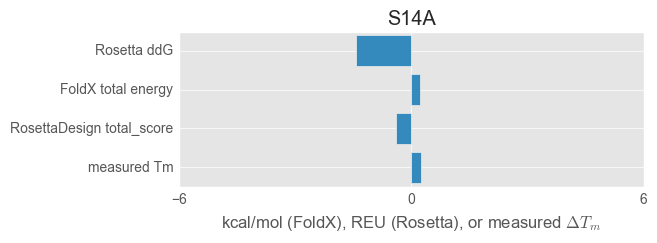

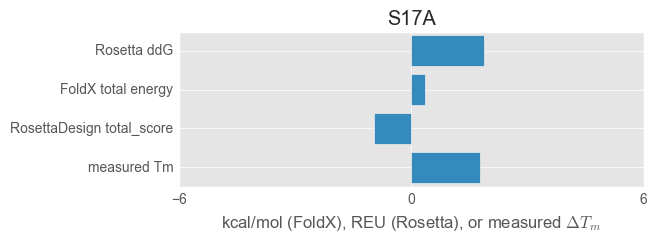

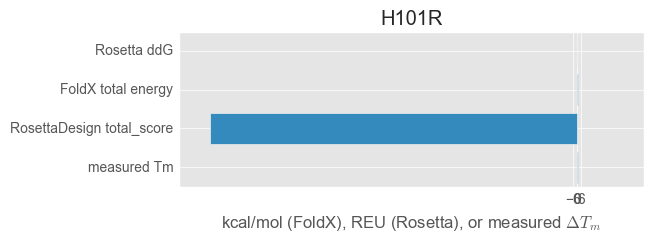

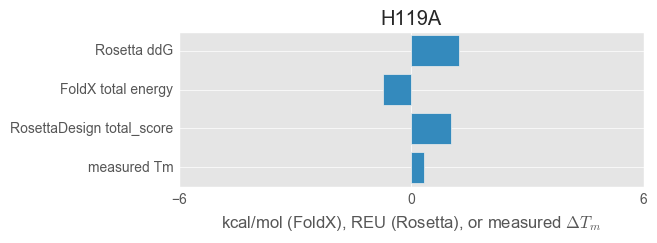

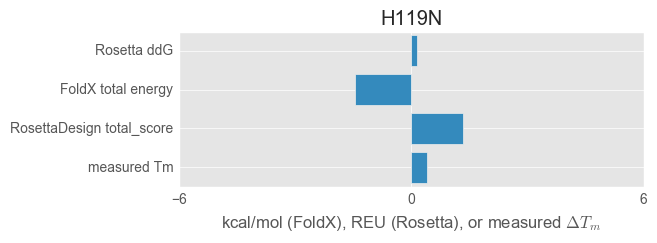

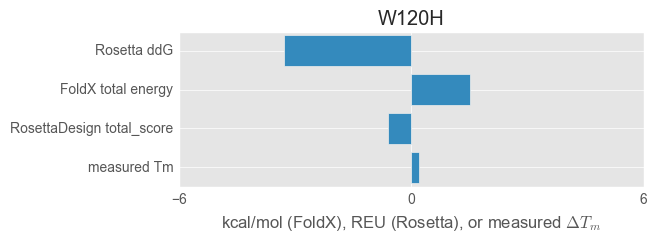

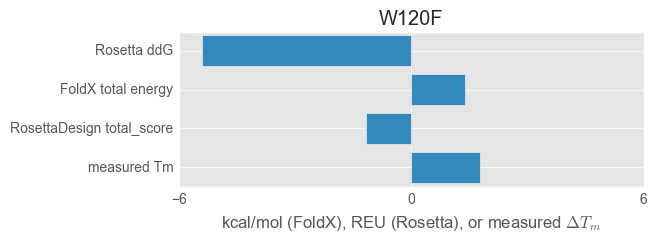

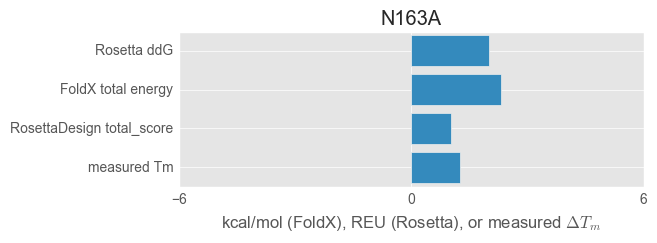

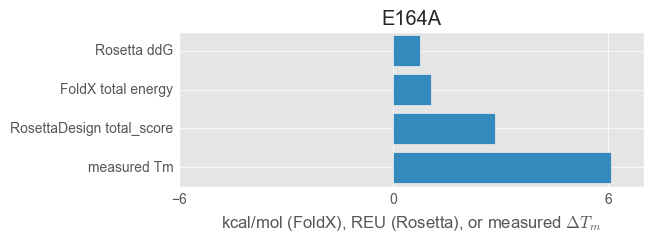

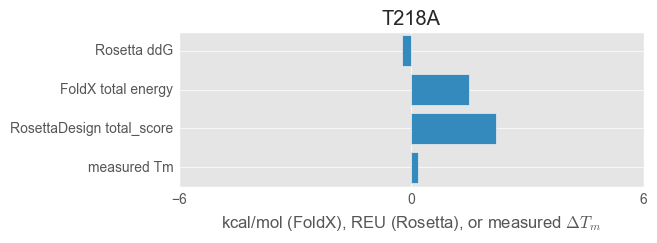

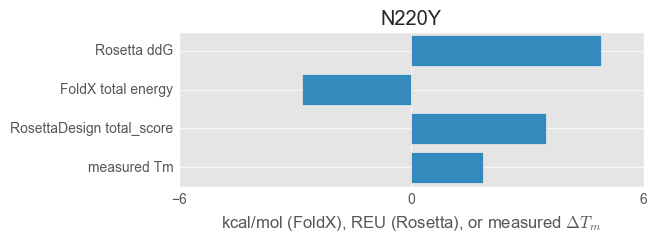

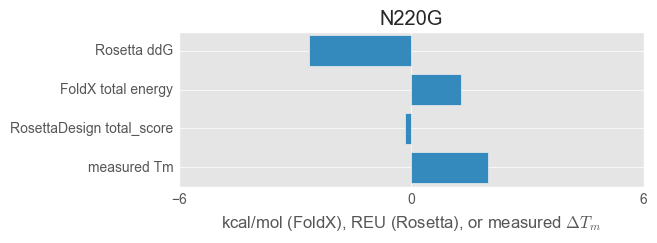

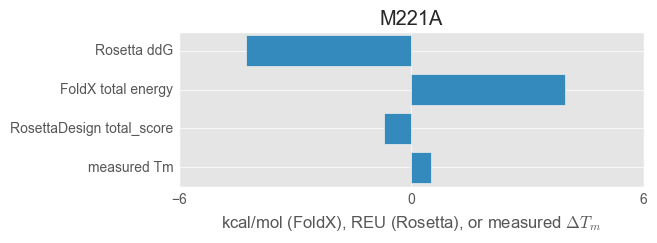

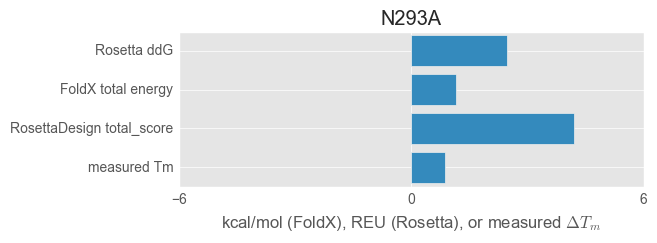

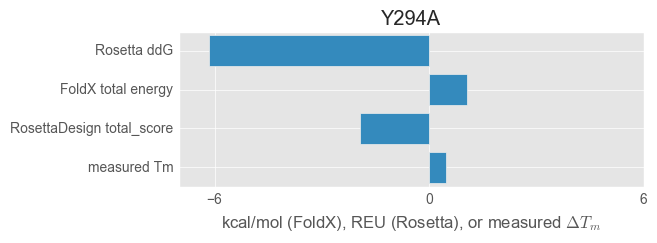

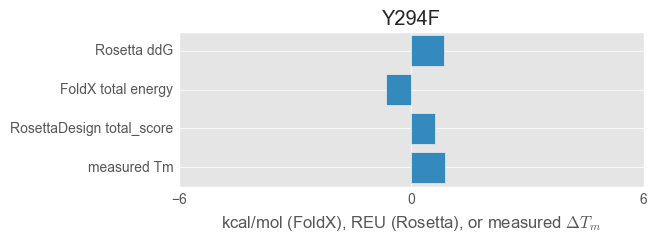

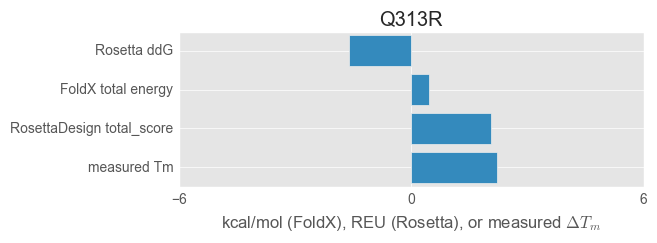

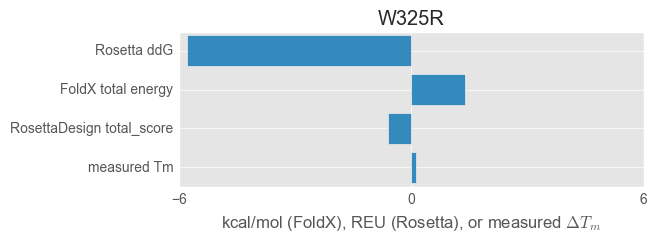

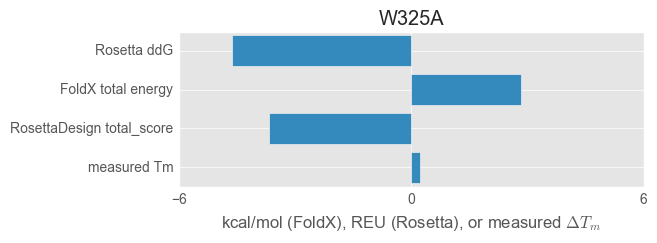

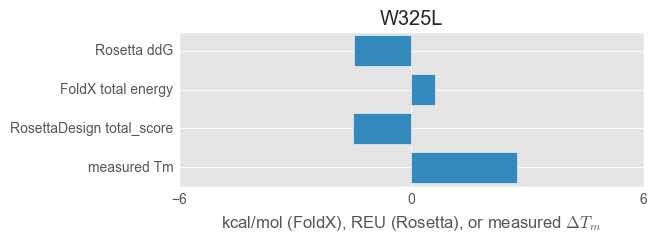

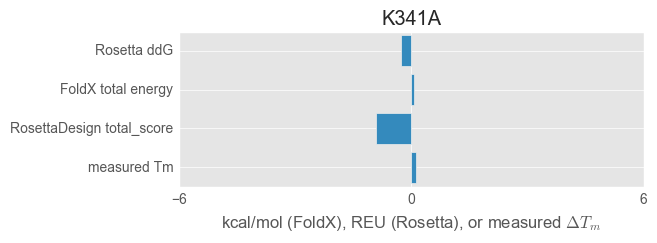

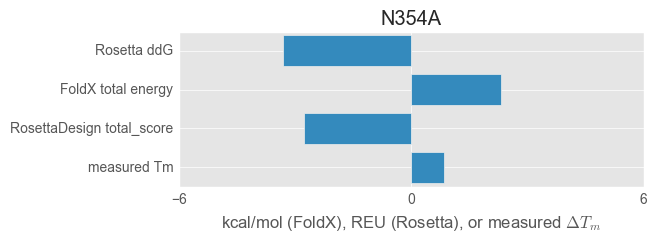

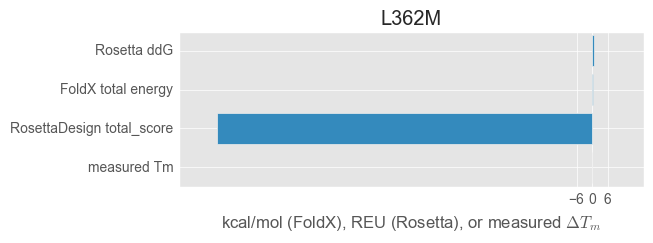

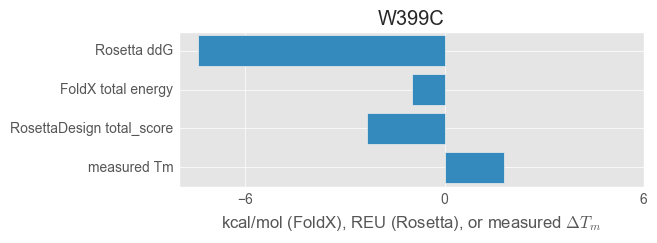

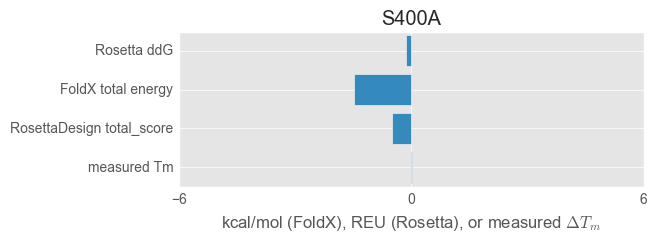

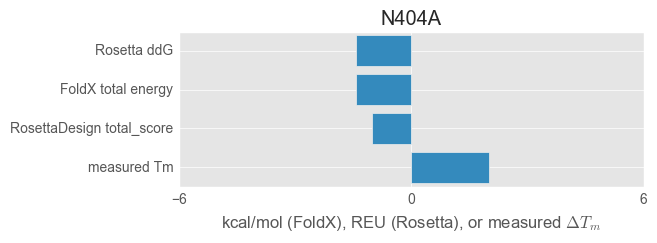

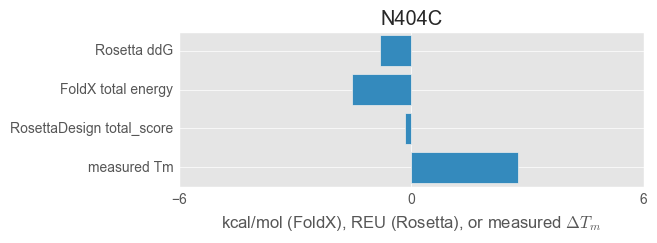

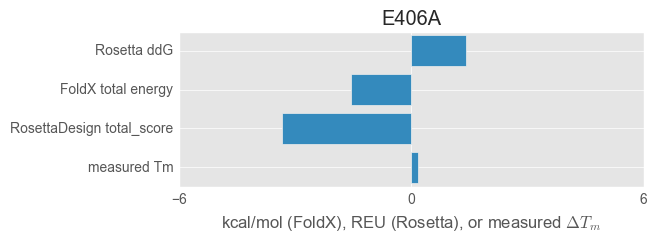

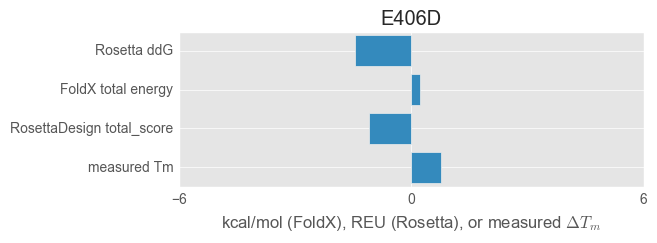

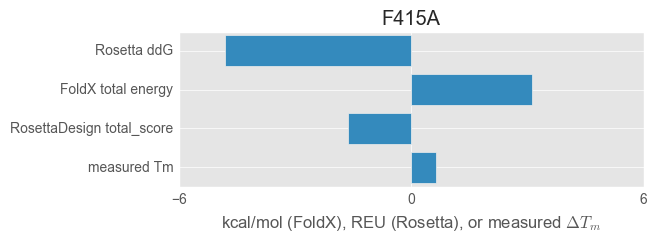

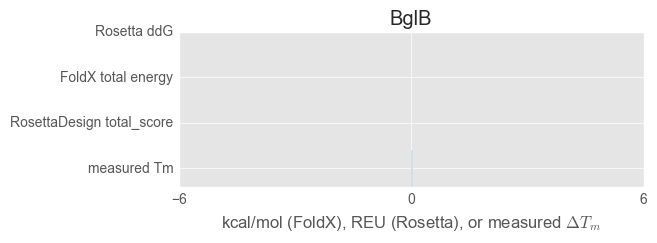

In [27]:
for m in df.index:
    measured = df.loc[ m ].tm - 39.9 
    if measured > 0:
        rosetta_design = - ( my_feature_sets[ 'benchmark' ].loc[ m ][ 'total_score' ] + 692 )
        foldx = my_feature_sets[ 'pssm' ].loc[ m ][ 'total energy' ]
        ddg = - my_feature_sets[ 'ddg_monomer' ].loc[ m ][ 'total' ] 

        plt.figure( figsize=( 6, 2 ) ) 
        plt.barh( range( 4 ), [ measured, rosetta_design, foldx, ddg ], align='center' )
        plt.yticks( range( 4 ), [ 'measured Tm', 'RosettaDesign total_score', 'FoldX total energy', 'Rosetta ddG' ] ) 
        plt.xlabel( 'kcal/mol (FoldX), REU (Rosetta), or measured $\Delta T_m$' ) 

        plt.xticks( [ -6, 0, 6 ] ) 
        plt.title( m ) 
        plt.show()